<a href="https://colab.research.google.com/github/SachinScaler/DAV1Aug24/blob/main/Pandas_3%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
# download dataset
# !gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
# !gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

In [142]:
import pandas as pd

movies = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/DAV1Aug24/main/movies.csv')
movies.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [143]:
import pandas as pd

# setting index_col as col 0
movies = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/DAV1Aug24/main/movies.csv', index_col = 0)
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


columns as features

In [144]:
movies.shape

(1465, 11)

In [145]:
movies['id'].nunique()

1465

In [146]:
movies['director_id'].nunique()

199

In [147]:
directors = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/DAV1Aug24/main/directors.csv', index_col = 0)
directors.head()

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male


In [148]:
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [149]:
directors.shape

(2349, 3)

Q: How can we find details of movies each director has made?

In [150]:
directors['director_name'].nunique()

2349

In [151]:
directors['id'].nunique()

2349

In [152]:
movies['director_id'].nunique()

199

- id from directors contains same info director_id from movies

In [153]:
directors['id'].nunique()

2349

### applying function on dataframe

In [154]:
movies['director_id']

,director_id
0,4762
1,4763
2,4764
3,4765
5,4767
...,...
4736,4809
4743,5369
4748,5148
4749,5535


In [155]:
import numpy  as np

# randomly selected director_id from movies is present in director
some_dir_id = 4767

np.any(directors['id'] == some_dir_id)

True

In [156]:
(directors['id'] == some_dir_id).value_counts()

,count
id,
False,2348
True,1


In [157]:
directors[directors['id'] == some_dir_id]

,director_name,id,gender
5,Sam Raimi,4767,Male


### isin
- isin: takes in iterable such as series, list, numpy array etc and return a series of True and False

In [158]:
directors['id']

,id
0,4762
1,4763
2,4764
3,4765
4,4766
...,...
2344,7106
2345,7107
2346,7108
2347,7109


In [159]:
movies['director_id'].isin([4767])

,director_id
0,False
1,False
2,False
3,False
5,True
...,...
4736,False
4743,False
4748,False
4749,False


In [160]:
# you can think for this as for_loop on director_id where each dir_id is being checked in directors['id']
np.all(movies['director_id'].isin(directors['id']))

True

In [161]:
data = pd.merge(movies, directors,
                left_on = 'director_id',
                right_on = 'id',
                suffixes=('_movies', '_dirs'))
data.head()

,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_dirs,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday,James Cameron,4762,Male
2,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday,James Cameron,4762,Male
3,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday,James Cameron,4762,Male
4,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday,James Cameron,4762,Male


In [162]:
data.shape

(1465, 14)

In [163]:
directors.head()

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male


In [164]:
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_movies      1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   director_id    1465 non-null   int64  
 8   year           1465 non-null   int64  
 9   month          1465 non-null   object 
 10  day            1465 non-null   object 
 11  director_name  1465 non-null   object 
 12  id_dirs        1465 non-null   int64  
 13  gender         1341 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 160.4+ KB


In [166]:
data.head()

,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_dirs,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday,James Cameron,4762,Male
2,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday,James Cameron,4762,Male
3,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday,James Cameron,4762,Male
4,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday,James Cameron,4762,Male


Specifying: suffixes=('_x', '_y')

In [167]:
data = data.drop('id_dirs', axis = 1)
data.head()

,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,Male
1,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday,James Cameron,Male
2,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday,James Cameron,Male
3,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday,James Cameron,Male
4,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday,James Cameron,Male


**IMDB data exploration**:
POST READ: IMDB data exploration https://colab.research.google.com/drive/1yrfHSQYUMxxLKGUG-gCPf-R232BuimiR?usp=sharing

In [168]:
# == -> single value
# isin -> collection

- male -> 0
- female -> 1

In [169]:
data['gender'].value_counts()

,count
gender,
Male,1309
Female,32


- apply some function on each row of gender column

In [170]:
def encode(x):
  if x == 'Female':
    return 1
  else:
    return 0

encode('Male')

0

In [171]:
encode('Female')

1

we need apply encode on every singe row of gender column

In [172]:
data['gender'].apply(encode) # series will rowwise

,gender
0,0
1,0
2,0
3,0
4,0
...,...
1460,1
1461,1
1462,1
1463,1


In [173]:
data['gender'] = data['gender'].apply(encode)
data.head()

,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,0
1,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday,James Cameron,0
2,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday,James Cameron,0
3,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday,James Cameron,0
4,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday,James Cameron,0


### let's take multiple cols and apply some func

In [174]:
np.sum([1,2])

3

###

In [175]:
data[['budget', 'revenue']].apply(np.sum) # colwise sum by applying functions on sum(rows) columnwise

,0
budget,70353617179
revenue,209866997305


In [176]:
data[['budget', 'revenue']].apply(np.sum, axis = 1) # row wise sum: budget + rev row_wise

,0
0,3024965087
1,2045034188
2,620000000
3,493882411
4,160000098
...,...
1460,25288872
1461,19868437
1462,3000000
1463,0


2 values with axis 0 or 1465 values with axis 0

What does this axis mean in apply?

```
axis=0
→ It will apply to each column

axis=1
→ It will apply to each row

```

#### calculate profit of each movie

profit -> rev-bud

In [177]:
def diff(x):
    return x['revenue'] - x['budget']


data['profit'] = data[['budget','revenue']].apply(diff, axis=1)
data.head()

,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender,profit
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,0,2550965087
1,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday,James Cameron,0,1645034188
2,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday,James Cameron,0,420000000
3,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday,James Cameron,0,263882411
4,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday,James Cameron,0,20000098


In [178]:
data[['budget','revenue']]

,budget,revenue
0,237000000,2787965087
1,200000000,1845034188
2,100000000,520000000
3,115000000,378882411
4,70000000,90000098
...,...,...
1460,0,25288872
1461,6500000,13368437
1462,3000000,0
1463,0,0


lambda x:

resume @ 8:26

### groupby

In [179]:
## let's try grouping each director
data.groupby('director_name')

In [180]:
data.groupby('director_name').ngroups

199

In [181]:
data.groupby('director_name').groups

{'Adam McKay': [635, 636, 637, 638, 639, 640], 'Adam Shankman': [792, 793, 794, 795, 796, 797, 798, 799], 'Alejandro González Iñárritu': [465, 466, 467, 468, 469, 470], 'Alex Proyas': [425, 426, 427, 428, 429], 'Alexander Payne': [1341, 1342, 1343, 1344, 1345], 'Andrew Adamson': [63, 64, 65, 66, 67], 'Andrew Niccol': [1177, 1178, 1179, 1180, 1181], 'Andrzej Bartkowiak': [913, 914, 915, 916, 917], 'Andy Fickman': [1152, 1153, 1154, 1155, 1156, 1157], 'Andy Tennant': [883, 884, 885, 886, 887, 888], 'Ang Lee': [441, 442, 443, 444, 445, 446, 447, 448], 'Anne Fletcher': [1262, 1263, 1264, 1265, 1266], 'Antoine Fuqua': [856, 857, 858, 859, 860, 861, 862, 863], 'Atom Egoyan': [1405, 1406, 1407, 1408, 1409, 1410], 'Barry Levinson': [870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882], 'Barry Sonnenfeld': [73, 74, 75, 76, 77, 78, 79], 'Ben Stiller': [721, 722, 723, 724, 725], 'Bill Condon': [454, 455, 456, 457, 458], 'Bobby Farrelly': [918, 919, 920, 921, 922, 923, 924, 925, 926, 9

In [182]:
data.groupby('director_name').get_group('Adam McKay')

,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender,profit
635,43882,100000000,24,170432927,The Other Guys,6.1,1383,4925,2010,Aug,Friday,Adam McKay,0,70432927
636,44151,72500000,12,162966177,Talladega Nights: The Ballad of Ricky Bobby,6.2,491,4925,2006,Aug,Friday,Adam McKay,0,90466177
637,44236,65000000,22,128107642,Step Brothers,6.5,1062,4925,2008,Jul,Friday,Adam McKay,0,63107642
638,44503,50000000,38,173649015,Anchorman 2: The Legend Continues,6.0,923,4925,2013,Dec,Wednesday,Adam McKay,0,123649015
639,45301,28000000,57,133346506,The Big Short,7.3,2607,4925,2015,Dec,Friday,Adam McKay,0,105346506
640,45443,26000000,29,90574188,Anchorman: The Legend of Ron Burgundy,6.7,1493,4925,2004,Jul,Friday,Adam McKay,0,64574188


how can we count number of movies for each director

In [183]:
# applying count function on title of each director_name group
data.groupby('director_name')['title'].count()

,title
director_name,
Adam McKay,6
Adam Shankman,8
Alejandro González Iñárritu,6
Alex Proyas,5
Alexander Payne,5
...,...
Wes Craven,10
Wolfgang Petersen,7
Woody Allen,18


### Ex2: Can we find multiple aggregates

q: can we find the first year  and last year in which each director made movies

In [184]:
data.groupby('director_name')['year'].min()

,year
director_name,
Adam McKay,2004
Adam Shankman,2001
Alejandro González Iñárritu,2000
Alex Proyas,1994
Alexander Payne,1999
...,...
Wes Craven,1984
Wolfgang Petersen,1981
Woody Allen,1977


In [185]:
data.groupby('director_name')['year'].max()

,year
director_name,
Adam McKay,2015
Adam Shankman,2012
Alejandro González Iñárritu,2015
Alex Proyas,2016
Alexander Payne,2013
...,...
Wes Craven,2011
Wolfgang Petersen,2006
Woody Allen,2013


In [186]:
data.groupby('director_name')['year'].agg(['min', 'max'])

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


In [187]:
# data.groupby('director_name')['year'].aggregate(['min', 'max'])

# same as abovs
dict_of_functions = {'year': ['min', 'max']}
data.groupby('director_name').aggregate(dict_of_functions)

year      
                              min   max
director_name                          
Adam McKay                   2004  2015
Adam Shankman                2001  2012
Alejandro González Iñárritu  2000  2015
Alex Proyas                  1994  2016
Alexander Payne              1999  2013
...                           ...   ...
Wes Craven                   1984  2011
Wolfgang Petersen            1981  2006
Woody Allen                  1977  2013
Zack Snyder                  2004  2016
Zhang Yimou                  2002  2014

[199 rows x 2 columns]

In [188]:
dict_of_functions = {'year': ['min', 'max'], 'revenue':['sum'], 'budget':['sum'], 'title': ['count']}
data.groupby('director_name').aggregate(dict_of_functions)

year           revenue     budget title
                              min   max         sum        sum count
director_name                                                       
Adam McKay                   2004  2015   859076455  341500000     6
Adam Shankman                2001  2012   873562773  387000000     8
Alejandro González Iñárritu  2000  2015   877979871  200000000     6
Alex Proyas                  1994  2016   774562458  352000000     5
Alexander Payne              1999  2013   410234956   78000000     5
...                           ...   ...         ...        ...   ...
Wes Craven                   1984  2011   764794281  233800000    10
Wolfgang Petersen            1981  2006  1615016083  631000000     7
Woody Allen                  1977  2013   620906323  212000000    18
Zack Snyder                  2004  2016  2476197387  860000000     7
Zhang Yimou                  2002  2014   365569811  125000110     6

[199 rows x 5 columns]

In [189]:
mulit_col_agg = {'year': ['min', 'max'], 'revenue':['sum']}
data.groupby('director_name').aggregate(mulit_col_agg)

year           revenue
                              min   max         sum
director_name                                      
Adam McKay                   2004  2015   859076455
Adam Shankman                2001  2012   873562773
Alejandro González Iñárritu  2000  2015   877979871
Alex Proyas                  1994  2016   774562458
Alexander Payne              1999  2013   410234956
...                           ...   ...         ...
Wes Craven                   1984  2011   764794281
Wolfgang Petersen            1981  2006  1615016083
Woody Allen                  1977  2013   620906323
Zack Snyder                  2004  2016  2476197387
Zhang Yimou                  2002  2014   365569811

[199 rows x 3 columns]

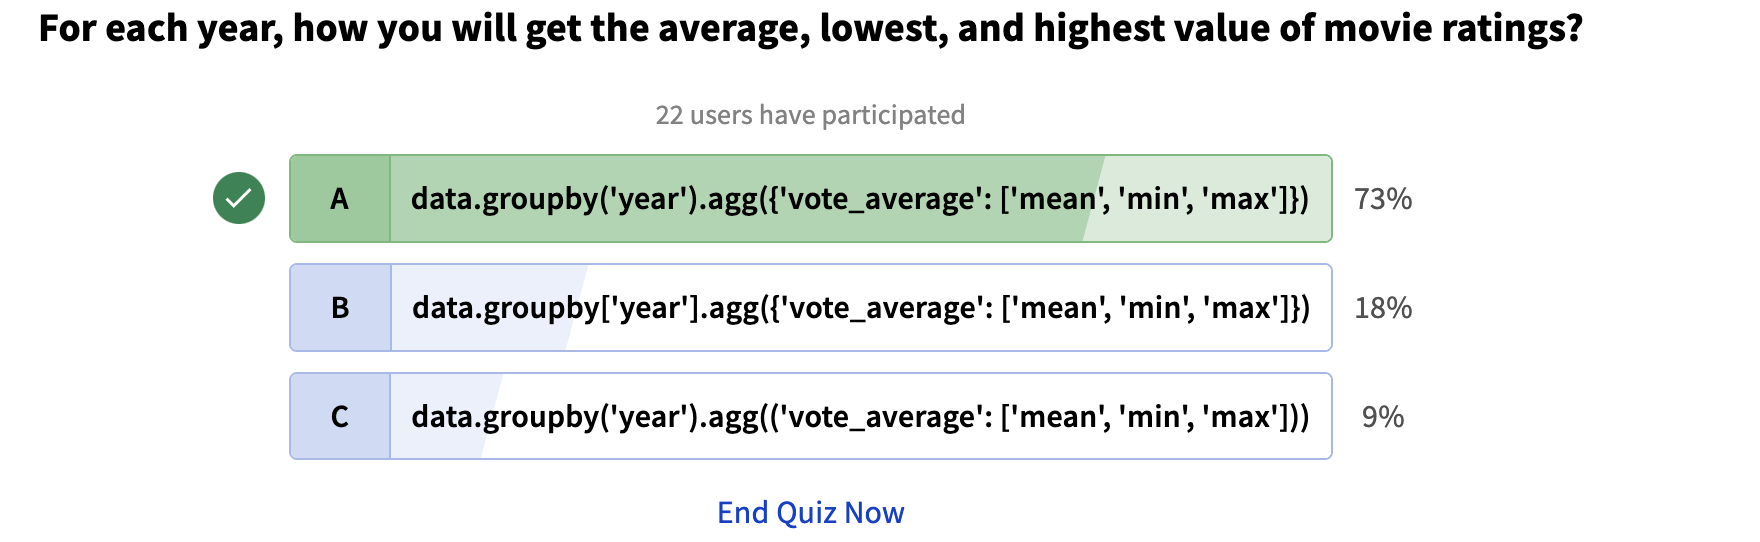

In [190]:
data.groupby('director_name')['year'].aggregate(['min', 'max'])

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


In [191]:
data.columns

Index(['id_movies', 'budget', 'popularity', 'revenue', 'title', 'vote_average',
       'vote_count', 'director_id', 'year', 'month', 'day', 'director_name',
       'gender', 'profit'],
      dtype='object')

In [192]:
data[['director_name', 'vote_average']]

,director_name,vote_average
0,James Cameron,7.2
1,James Cameron,7.5
2,James Cameron,7.7
3,James Cameron,6.8
4,James Cameron,7.1
...,...,...
1460,Nicole Holofcener,6.6
1461,Nicole Holofcener,5.1
1462,Nicole Holofcener,6.0
1463,Nicole Holofcener,6.6


In [193]:
data.columns

Index(['id_movies', 'budget', 'popularity', 'revenue', 'title', 'vote_average',
       'vote_count', 'director_id', 'year', 'month', 'day', 'director_name',
       'gender', 'profit'],
      dtype='object')

if we don't specify for aggregate, it will try to aggregate full df.

In [194]:
data.groupby('director_name').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [201]:
data_num = data[['director_name','profit', 'revenue', 'vote_average']]

In [202]:
data_num.groupby('director_name').mean()

,profit,revenue,vote_average
director_name,,,
Adam McKay,8.626274e+07,1.431794e+08,6.466667
Adam Shankman,6.082035e+07,1.091953e+08,6.037500
Alejandro González Iñárritu,1.129966e+08,1.463300e+08,7.233333
Alex Proyas,8.451249e+07,1.549125e+08,6.480000
Alexander Payne,6.644699e+07,8.204699e+07,6.880000
...,...,...,...
Wes Craven,5.309943e+07,7.647943e+07,5.950000
Wolfgang Petersen,1.405737e+08,2.307166e+08,6.571429
Woody Allen,2.271702e+07,3.449480e+07,6.672222


quiz 2: id, rating
```
emd_data.groupby('id').mean()
emd_data.groupby('id')['rating'].mean()
```

## HW
HW: we will discuss in the next session
### filtering:

Q: Extract Directors whose atleast one movie had budget >100M.

### apply function on Group for custom function:

Q: find the most productive director?
productive: title_count/yrs_active for example let's say director d made his first movies in 2004 and his last movie in 2015. In between 2004 and 2015 he made 16 movies then his productive can be calculates as 16/(2004 - 2015) = 16/11 = 1.45 movies a year


In [203]:
data

,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender,profit
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,0,2550965087
1,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday,James Cameron,0,1645034188
2,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday,James Cameron,0,420000000
3,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday,James Cameron,0,263882411
4,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday,James Cameron,0,20000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,46859,0,14,25288872,Enough Said,6.6,348,6204,2013,Sep,Wednesday,Nicole Holofcener,1,25288872
1461,47023,6500000,11,13368437,Friends with Money,5.1,128,6204,2006,Sep,Thursday,Nicole Holofcener,1,6868437
1462,47524,3000000,5,0,Please Give,6.0,57,6204,2010,Jan,Friday,Nicole Holofcener,1,-3000000
1463,47962,0,0,0,Walking and Talking,6.6,7,6204,1996,Jul,Wednesday,Nicole Holofcener,1,0


In [204]:
def profit(x):
    return x['revenue'] - x['budget']

data.apply(profit, axis = 1)  # row one by one will be x

,0
0,2550965087
1,1645034188
2,420000000
3,263882411
4,20000098
...,...
1460,25288872
1461,6868437
1462,-3000000
1463,0


In [205]:
x = data.loc[0]
x['revenue'] - x['budget']

2550965087

In [206]:
list1= [1,2,3,4]
list(map(lambda x: x+1, list1))

[2, 3, 4, 5]

In [207]:
data['profit'] = data.apply(profit, axis = 1)
data.head()
#I am confused with syntax and flow of the code and how to write such type of questions (syntax clarification)

,id_movies,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender,profit
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,0,2550965087
1,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday,James Cameron,0,1645034188
2,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday,James Cameron,0,420000000
3,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday,James Cameron,0,263882411
4,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday,James Cameron,0,20000098


how we will filter when we have movie date as 07/ 2024 and 08/2024 for same director??(if do apply on 'year')


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_movies      1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   director_id    1465 non-null   int64  
 8   year           1465 non-null   int64  
 9   month          1465 non-null   object 
 10  day            1465 non-null   object 
 11  director_name  1465 non-null   object 
 12  gender         1465 non-null   int64  
 13  profit         1465 non-null   int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 160.4+ KB


In [209]:
data['year'].astype(str) + data['year'].astype(str)

,year
0,20092009
1,19971997
2,19911991
3,19941994
4,19891989
...,...
1460,20132013
1461,20062006
1462,20102010
1463,19961996


In [210]:

np.argmax([1,2,1])

1

In [211]:
data['year'].argmax()

40

In [212]:
data[['year']].argmax()

AttributeError: 'DataFrame' object has no attribute 'argmax'

In [ ]:
###  date time datatype

#how to add a row in dataframe at particular index?
# data.loc[1] = [full row]
# data.iloc[0] = [full row]
# split on index in two pars, add et end in split1 and then concatenate

- copy deepcopy
- Request to solve pandas-2, question - 6 using concat func ...

In [213]:
2011 in data['year'].to_list()

True

In [214]:
data['year']

,year
0,2009
1,1997
2,1991
3,1994
4,1989
...,...
1460,2013
1461,2006
1462,2010
1463,1996
